## imports for Python, Pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from pandas.io.json import json_normalize

****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [11]:
#Import data
world_df=pd.read_json("data/world_bank_projects.json")

#Take a look at the file
world_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
_id                         500 non-null object
approvalfy                  500 non-null int64
board_approval_month        500 non-null object
boardapprovaldate           500 non-null object
borrower                    485 non-null object
closingdate                 370 non-null object
country_namecode            500 non-null object
countrycode                 500 non-null object
countryname                 500 non-null object
countryshortname            500 non-null object
docty                       446 non-null object
envassesmentcategorycode    430 non-null object
grantamt                    500 non-null int64
ibrdcommamt                 500 non-null int64
id                          500 non-null object
idacommamt                  500 non-null int64
impagency                   472 non-null object
lendinginstr                495 non-null object
lendinginstrtype            495 non

In [12]:
world_df.head()

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{'$oid': '52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"{'Percent': 50, 'Name': 'Participation and civ...","[{'code': '57', 'name': 'Participation and civ...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,{'$oid': '52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,"{'Percent': 30, 'Name': 'Export development an...","[{'code': '45', 'name': 'Export development an...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...


## 1. Find the 10 countries with most projects


In [14]:
#Find the top ten countries with most projects
world_df["countryname"].value_counts().head(10)

Republic of Indonesia              19
People's Republic of China         19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Kingdom of Morocco                 12
People's Republic of Bangladesh    12
Nepal                              12
Republic of Mozambique             11
Africa                             11
Name: countryname, dtype: int64

 ## 2. Find the top 10 major project themes 

+ Approach 1: using a dictionary and for loops

In [21]:
#Create an empty dictionary to count the themes
countcode={}

#A function that fills the dictionary countcode
def find_top_themes(series):
    
    #loop over every row of the series
    for row in series: 
        
        #Each row is a list, possibly containing multiple dictionaires {code: codeValue, name: nameValue}
        #Loop over each dictionary element in a row
        for codeIndex in range(len(row)):
            
            #If codeValue exists in countcode, increase the count by 1
            #Otherwise, insert the codeValue and initialize the count as 1
            codeValue =row[codeIndex]["code"]
            if codeValue in countcode:
                countcode[codeValue]+=1
            else:
                countcode[codeValue]=1
    

#Run the function to fill out countcode
#countcode now contains {key:value} = {codeValue: counts} pairs
find_top_themes(world_df["mjtheme_namecode"])


In [22]:
#Turn the dictionary containing into a Pandas series
countcode_series=pd.Series(countcode)

#Change the index type from string to integer
#This will allow us to sort the index correctly
#String index will get sorted 1, 10, 11, 2, 3, ...
countcode_series.index = pd.to_numeric(countcode_series.index)

In [24]:
#Sort the index with the highest value to the lowest 
countcode_series.sort_values(ascending=False)
#Print only the top ten
countcode_series.sort_values(ascending=False)[:10]

11    250
10    216
8     210
2     199
6     168
4     146
7     130
5      77
9      50
1      38
dtype: int64

+ Approch 2 : adding all sub-dictionaries under world_df.mjtheme_namecode

In [34]:
#Create a list of sub-dictionaries
#Turn that into a DataFrame with two columns 'code' and 'name'
#Select 'code' column and count the occurance of each code value
pd.DataFrame(world_df.mjtheme_namecode.sum()).code.value_counts()

#Print only the top ten
pd.DataFrame(world_df.mjtheme_namecode.sum()).code.value_counts()[:10]

11    250
10    216
8     210
2     199
6     168
4     146
7     130
5      77
9      50
1      38
Name: code, dtype: int64

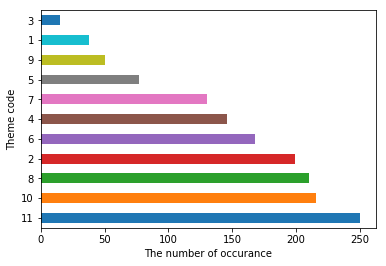

In [36]:
#Plot Theme code vs The number of occurance for all codes (not just top ten)
countseries=pd.DataFrame(world_df.mjtheme_namecode.sum()).code.value_counts().plot(kind="barh")
plt.ylabel("Theme code")
plt.xlabel ("The number of occurance")
plt.show()

## 3. Create a dataframe with the missing names filled in.

In [39]:
#Create a DataFrame with the first row of world_df.mjtheme_namecode
df=pd.DataFrame(world_df.mjtheme_namecode[0])

#Loop over the rest of rows of world_df.mjtheme_namecode
#Create a small DataFrame per row and append vertically
for i in range(1, len(world_df.mjtheme_namecode)):
    df=df.append(pd.DataFrame(world_df.mjtheme_namecode[i]))
df=df.sort_values("code").replace("", method="ffill").sort_index()



  code                                      name
0    4  Financial and private sector development
0    4  Financial and private sector development
0    4  Financial and private sector development
0    4  Financial and private sector development
0    4  Financial and private sector development
0    4  Financial and private sector development
0    4  Financial and private sector development
0    4  Financial and private sector development
0    4  Financial and private sector development
0    4  Financial and private sector development
0    4  Financial and private sector development
0    4  Financial and private sector development
0    4  Financial and private sector development
0    4  Financial and private sector development
0    4  Financial and private sector development
0    4  Financial and private sector development
0    4  Financial and private sector development
0    4  Financial and private sector development
0    4  Financial and private sector development
0    4  Financial an

In [38]:
df

,code,name
0,8,Human development
1,11,
0,1,Economic management
1,6,Social protection and risk management
0,5,Trade and integration
1,2,Public sector governance
2,11,Environment and natural resources management
3,6,Social protection and risk management
0,7,Social dev/gender/inclusion
1,7,Social dev/gender/inclusion
